In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_excel('DST_BIL54_train.xlsx', index_col=0).T

In [3]:
Y = train['Drivmidler i alt']

In [4]:
X = np.arange(2018, 2018 + len(Y)/12 -1/12,  1/12)

In [5]:
len(X)

59

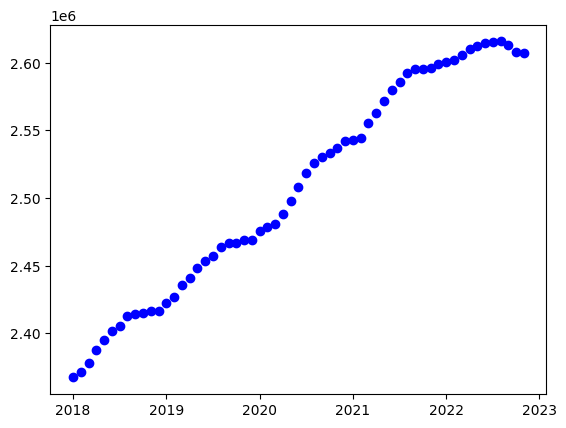

In [6]:
plt.plot(X, Y, 'bo')

In [7]:
x = X

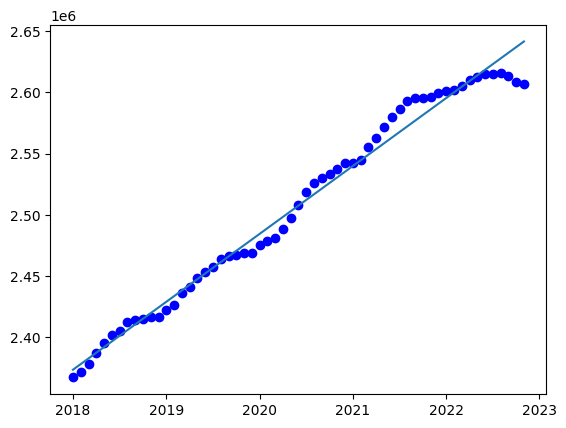

In [13]:
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')




In [9]:
# getting column 
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [10]:
X = np.hstack((np.ones((len(X),1)), X))

In [11]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [12]:
Theta

array([[-1.09499933e+08],
       [ 5.54377830e+04]])

In [14]:
e = Y - X @ Theta

In [15]:
e2 = e.T @ e

In [16]:
var = e2 / (len(Y)-2)

In [17]:
var 

array([[1.07475954e+08]])

In [18]:
Y.mean()

2507488.0169491526

In [19]:
Var_theta = np.linalg.inv(X.T @ X) * var

In [20]:
se_theta_0 = np.sqrt(Var_theta[0,0])
se_theta_1 = np.sqrt(Var_theta[1,1])

In [21]:
se_theta_0, se_theta_1

(1921555.551097915, 951.0687121138511)

In [22]:
# 3 

next_12 = np.arange(1/12, 1 + 1/12, 1/12)

In [23]:
next_12

array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [24]:
# adding the begginging of time
next_12 = next_12 + X[-1][1]

In [25]:
X12 = np.hstack((np.ones(12).reshape(-1,1), next_12.reshape(-1,1)))

In [26]:
X12 @ Theta

array([[2646082.47388972],
       [2650702.28913693],
       [2655322.10438412],
       [2659941.91963132],
       [2664561.73487853],
       [2669181.55012572],
       [2673801.36537291],
       [2678421.18062012],
       [2683040.99586731],
       [2687660.8111145 ],
       [2692280.62636171],
       [2696900.44160891]])

In [27]:
# get t-student value 
from scipy.stats import t

alpha = 0.1


t_value = t.ppf(alpha/2, len(Y)-2) # this is negative but t-student is symmetric 
# -1.9431802803927818

In [28]:
t.ppf(alpha/2, 7-2) 

-2.0150483726691575

In [29]:
X12

array([[1.00000000e+00, 2.02291667e+03],
       [1.00000000e+00, 2.02300000e+03],
       [1.00000000e+00, 2.02308333e+03],
       [1.00000000e+00, 2.02316667e+03],
       [1.00000000e+00, 2.02325000e+03],
       [1.00000000e+00, 2.02333333e+03],
       [1.00000000e+00, 2.02341667e+03],
       [1.00000000e+00, 2.02350000e+03],
       [1.00000000e+00, 2.02358333e+03],
       [1.00000000e+00, 2.02366667e+03],
       [1.00000000e+00, 2.02375000e+03],
       [1.00000000e+00, 2.02383333e+03]])

In [30]:
X12.T @ np.linalg.inv(X.T @ X) @ X12

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 12)

In [31]:
(1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

array([[1.06954997, 1.07130333, 1.07305669, 1.07481005, 1.07656341,
        1.07831677, 1.08007013, 1.08182349, 1.08357686, 1.08533022,
        1.08708358, 1.08883694],
       [1.07130333, 1.07311514, 1.07492694, 1.07673875, 1.07855056,
        1.08036236, 1.08217417, 1.08398597, 1.08579778, 1.08760958,
        1.08942139, 1.0912332 ],
       [1.07305669, 1.07492694, 1.07679719, 1.07866745, 1.0805377 ,
        1.08240795, 1.0842782 , 1.08614845, 1.0880187 , 1.08988895,
        1.09175921, 1.09362946],
       [1.07481005, 1.07673875, 1.07866745, 1.08059614, 1.08252484,
        1.08445354, 1.08638223, 1.08831093, 1.09023963, 1.09216832,
        1.09409702, 1.09602572],
       [1.07656341, 1.07855056, 1.0805377 , 1.08252484, 1.08451198,
        1.08649912, 1.08848627, 1.09047341, 1.09246055, 1.09444769,
        1.09643483, 1.09842198],
       [1.07831677, 1.08036236, 1.08240795, 1.08445354, 1.08649912,
        1.08854471, 1.0905903 , 1.09263589, 1.09468147, 1.09672706,
        1.09877265,

In [32]:
v_es = var *  (1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

In [33]:
confidence =  t_value *  np.sqrt(v_es.diagonal())

In [34]:
X12 @ Theta - confidence.reshape(-1,1),  X12 @ Theta + confidence.reshape(-1,1)

(array([[2664009.15819131],
        [2668658.82638887],
        [2673309.42136255],
        [2677960.93836294],
        [2682613.3725324 ],
        [2687266.71890822],
        [2691920.97242623],
        [2696576.12792397],
        [2701232.1801448 ],
        [2705889.12374055],
        [2710546.95327604],
        [2715205.66323152]]),
 array([[2628155.78958814],
        [2632745.75188499],
        [2637334.7874057 ],
        [2641922.90089969],
        [2646510.09722465],
        [2651096.38134321],
        [2655681.75831959],
        [2660266.23331626],
        [2664849.81158983],
        [2669432.49848846],
        [2674014.29944739],
        [2678595.21998629]]))

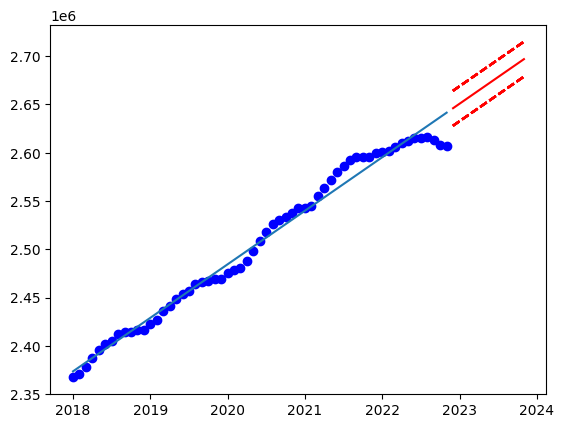

In [35]:
# plot me data with confidence intervals 
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')

plt.plot(X12[:,1], X12 @ Theta, 'r-')
plt.plot(X12[:,1], X12 @ Theta - confidence, 'r--')
plt.plot(X12[:,1], X12 @ Theta + confidence, 'r--')


##################################################################################################################################################################################################################################################################################################################################################################################

In [36]:
L = np.array([[1, 0], [1, 1]])
f_0 = np.array([[1, 0]])          #(3.83)
f_0=f_0.T

In [37]:
import numpy as np

#function f(j)...f(0)=np.array (1,0)
def f(j):
    return np.array([[1, j]]).T

# Define L and its inverse L_inv
L = np.array([[1, 0], [1, 1]])
L_inv = np.linalg.inv(L)

#f_0 = f(0)
f_0t = np.transpose(f_0)
F_i = f_0 * f_0.T
h_i = f_0 * Y[0] 

## (3.94) and (3.95)
#F_1 = F_i + f(-1) @ f(-1).T  #f(-1) since we're considering N=0 for the update to N+1=1
#h_1 = L_inv @ h_i + f(0) * Y[1]  #Y[1] is second observation (Y[N+1])

print("F_1:", F_i)
print("h_1:", h_i)


F_1: [[1 0]
 [0 0]]
h_1: [[2367154]
 [      0]]


In [40]:
print(F_i)
print(f(i))
print(f(i).T)

[[  6.5132156  -23.75109638]
 [-23.75109638 137.46023515]]
[[1]
 [9]]
[[1 9]]


In [39]:
lambda_ = 0.9

## (3.100)
for i in range(1, 10):
    F_i = F_i + lambda_**i * f(-i) @ f(-i).T 
    h_i = lambda_ * L_inv @ h_i + f_0 * Y[i]  

F_10 = F_i
h_10 = h_i
print("F_10:\n", F_10)
print("h_10:\n", h_10)

F_10:
 [[  6.5132156  -23.75109638]
 [-23.75109638 137.46023515]]
h_10:
 [[ 15628556.81637141]
 [-56709555.93933485]]


In [ ]:
F_i

array([[  6.5132156 , -23.75109638],
       [-23.75109638, 137.46023515]])

In [41]:
predictions_1_month_ahead = []

for i in range(10, 59):
    f_i = f(i-1)
    F_i = F_i + lambda_**i * f(-i) @ f(-i).T
    h_i = lambda_ * L_inv @ h_i + f_0 * Y[i]    # Assuming Y[i] is a scalar, use np.outer

    # Estimate theta at step N
    theta_N = np.linalg.inv(F_i) @ h_i

    # Calculate predictions
    if i+1 < len(Y):
        predictions_1_month_ahead.append(f(1).T @ theta_N)

# F_59 and h_59 after 59 iterations
F_59 = F_i
h_59 = h_i

# Output predictions
print("Predictions 1 month ahead:", predictions_1_month_ahead)

Predictions 1 month ahead: [array([[2426889.81965288]]), array([[2427428.2232533]]), array([[2429918.7152758]]), array([[2432803.41444713]]), array([[2437983.75501598]]), array([[2443240.74128431]]), array([[2449176.51129417]]), array([[2455069.43612251]]), array([[2460285.2294623]]), array([[2465918.65082035]]), array([[2470772.74390635]]), array([[2474389.28686176]]), array([[2477448.63295051]]), array([[2479605.35990681]]), array([[2482790.85735891]]), array([[2485878.87746719]]), array([[2488729.79294174]]), array([[2492699.68702005]]), array([[2498014.12272251]]), array([[2504715.52755699]]), array([[2512376.64261895]]), array([[2520207.27980585]]), array([[2527365.83907847]]), array([[2533719.24184246]]), array([[2539550.23855355]]), array([[2545233.91218471]]), array([[2549698.95005845]]), array([[2553530.0416868]]), array([[2558912.59330995]]), array([[2564817.72161586]]), array([[2571337.67569694]]), array([[2578384.68540719]]), array([[2585287.90576234]]), array([[2592252.696

In [42]:
predictions_1_month_ahead

[array([[2426889.81965288]]),
 array([[2427428.2232533]]),
 array([[2429918.7152758]]),
 array([[2432803.41444713]]),
 array([[2437983.75501598]]),
 array([[2443240.74128431]]),
 array([[2449176.51129417]]),
 array([[2455069.43612251]]),
 array([[2460285.2294623]]),
 array([[2465918.65082035]]),
 array([[2470772.74390635]]),
 array([[2474389.28686176]]),
 array([[2477448.63295051]]),
 array([[2479605.35990681]]),
 array([[2482790.85735891]]),
 array([[2485878.87746719]]),
 array([[2488729.79294174]]),
 array([[2492699.68702005]]),
 array([[2498014.12272251]]),
 array([[2504715.52755699]]),
 array([[2512376.64261895]]),
 array([[2520207.27980585]]),
 array([[2527365.83907847]]),
 array([[2533719.24184246]]),
 array([[2539550.23855355]]),
 array([[2545233.91218471]]),
 array([[2549698.95005845]]),
 array([[2553530.0416868]]),
 array([[2558912.59330995]]),
 array([[2564817.72161586]]),
 array([[2571337.67569694]]),
 array([[2578384.68540719]]),
 array([[2585287.90576234]]),
 array([[25922

Best lambda: 0.55
Best RMSE: 3980.507987844125


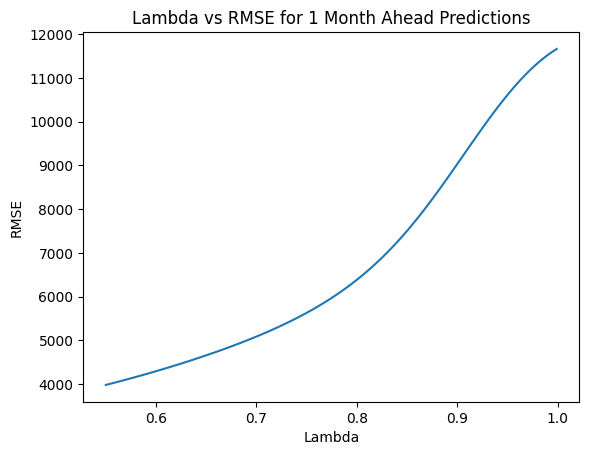

In [58]:
from sklearn.metrics import mean_squared_error

#lambda range
lambdas = np.linspace(0.55, 0.999, 100)
rmse_values = []

#iteration over lambda values
for lambda_ in lambdas:
    F_i = np.outer(f(0), f(0))
    h_i = np.dot(f(0), Y[0])

    predictions = []
    #F_i and h_i updated to the length of Y - 1
    for i in range(1, len(Y) - 1):
        f_i = f(i-1)
        F_i = F_i + lambda_**i * np.outer(f(-i), f(-i))
        h_i = lambda_ * L_inv @ h_i + np.dot(f(0), Y[i])
        #pass 10
        if i >= 10:
            theta_N = np.linalg.solve(F_i, h_i)
            #prediction is a scalar
            prediction = np.dot(f(1).T, theta_N)
            predictions.append(prediction.item())

    #computing RMSE starting from 10th to the last element of Y
    actual_values = Y[11:]  
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    rmse_values.append(rmse)

#best lambda and RMSE
best_lambda_index = np.argmin(rmse_values)
best_lambda = lambdas[best_lambda_index]
best_rmse = rmse_values[best_lambda_index]
print(f'Best lambda: {best_lambda}')
print(f'Best RMSE: {best_rmse}')

plt.plot(lambdas, rmse_values)
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lambda vs RMSE for 1 Month Ahead Predictions')
plt.show()

In [ ]:
#############################################################################################################################